**Content**
Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): 

CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to ﬁve Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town

B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town

LSTAT: % lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

We can see that the input attributes have a mixture of units.

In [91]:
import pandas as pd 

In [92]:
house = pd.read_excel('Boston_Housing.xlsx')

In [93]:
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


***Backup data***

In [94]:
backup_data = house.copy()

In [95]:
house.shape

(506, 14)

In [96]:
house.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [97]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [98]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**house price**

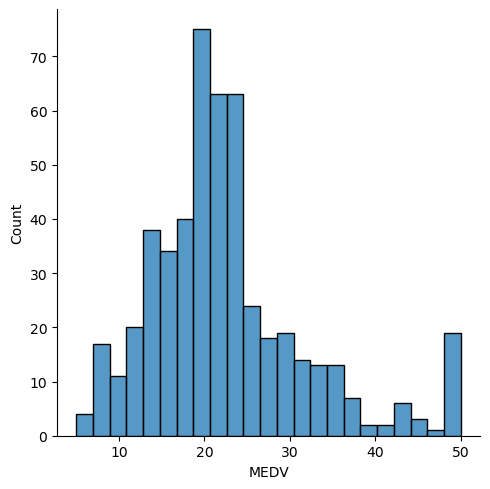

In [99]:
sns.displot(house['MEDV'])

**price vs rooms**

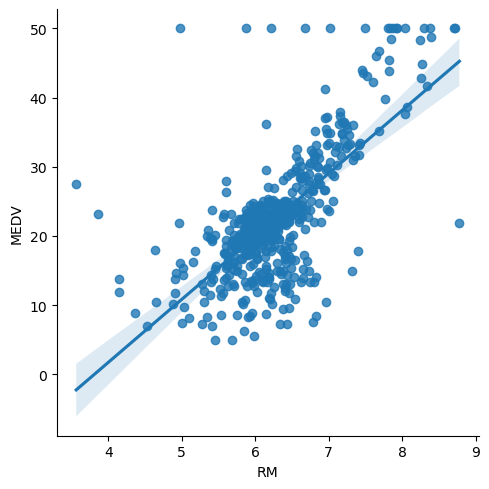

In [100]:
sns.lmplot(data=house, x='RM', y='MEDV')


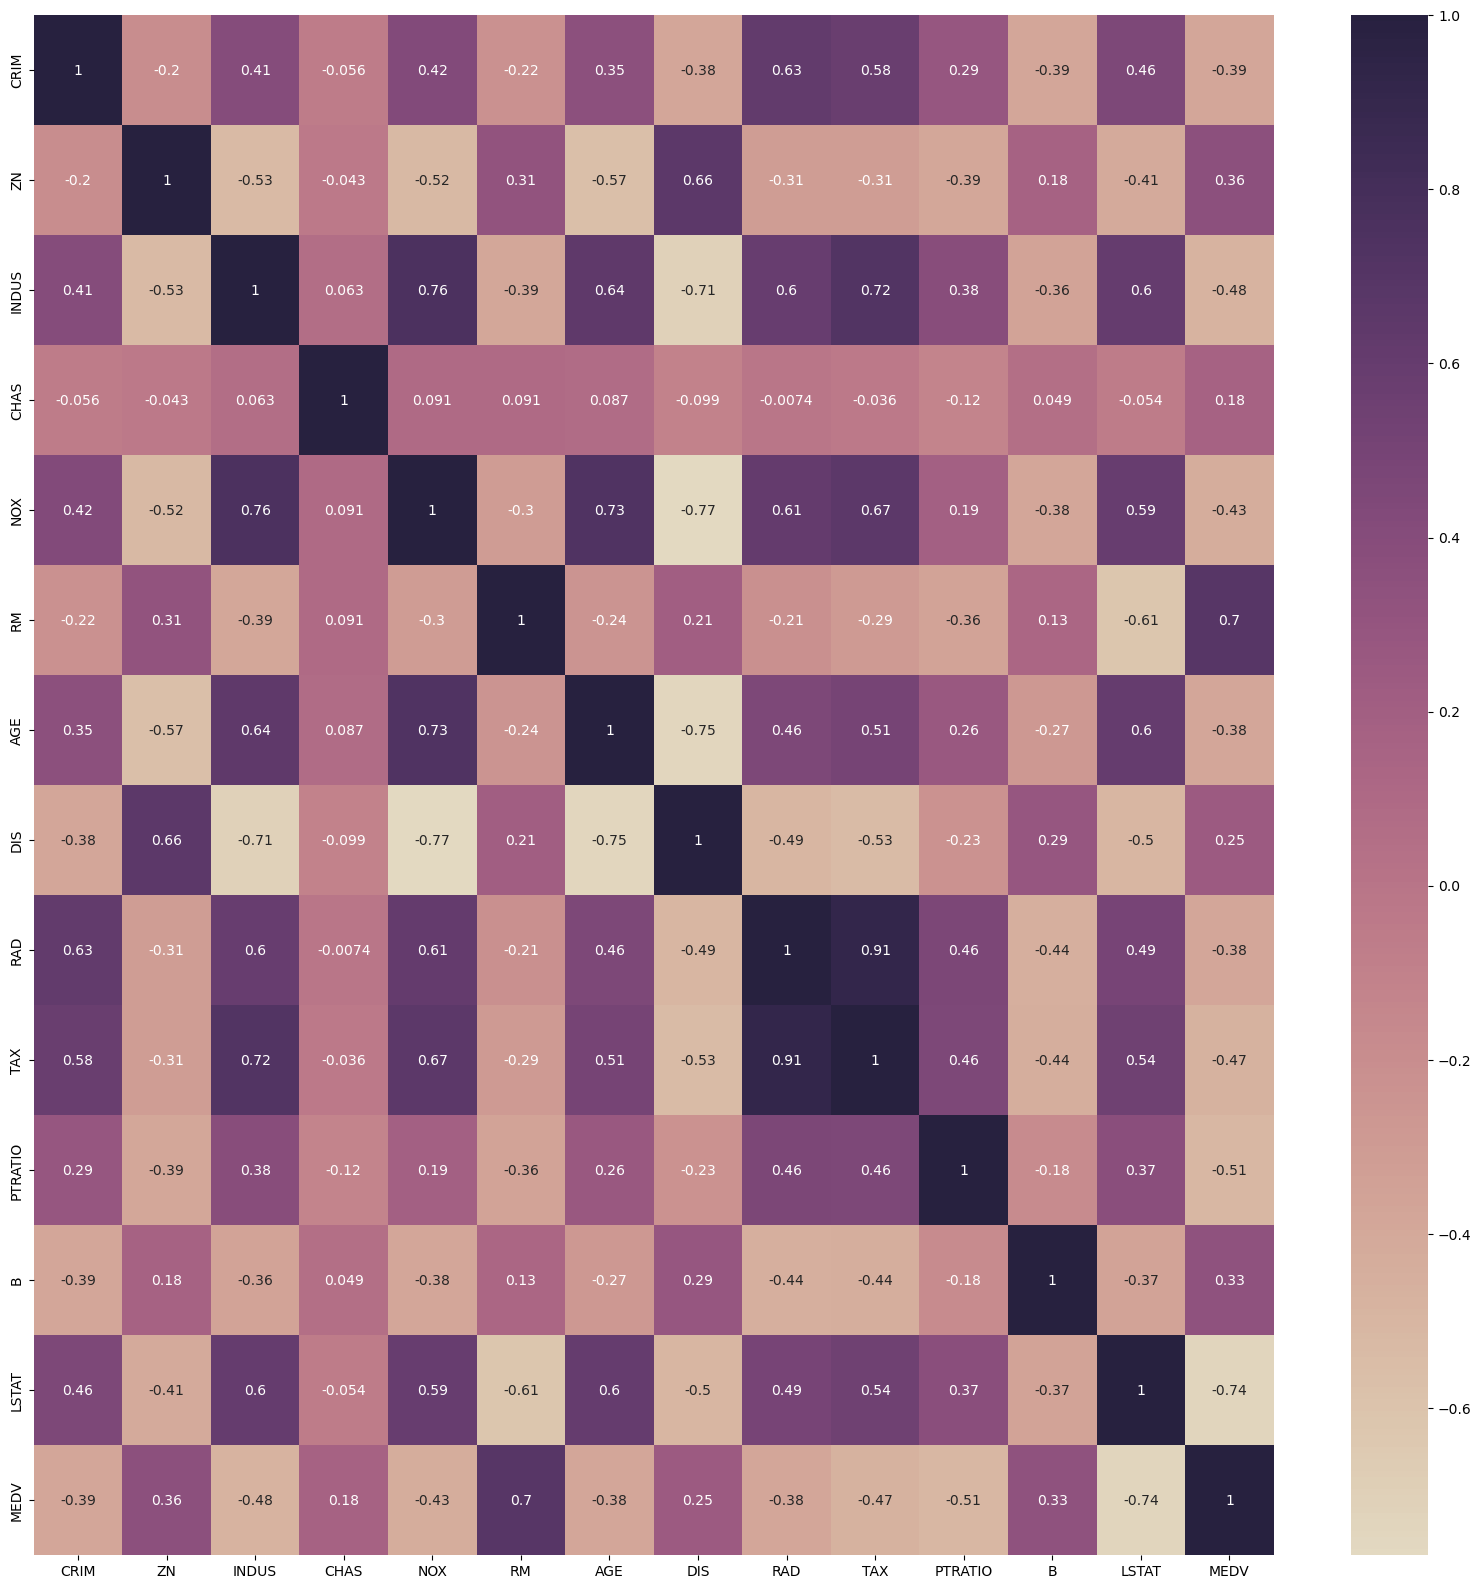

In [101]:
corr = house.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()

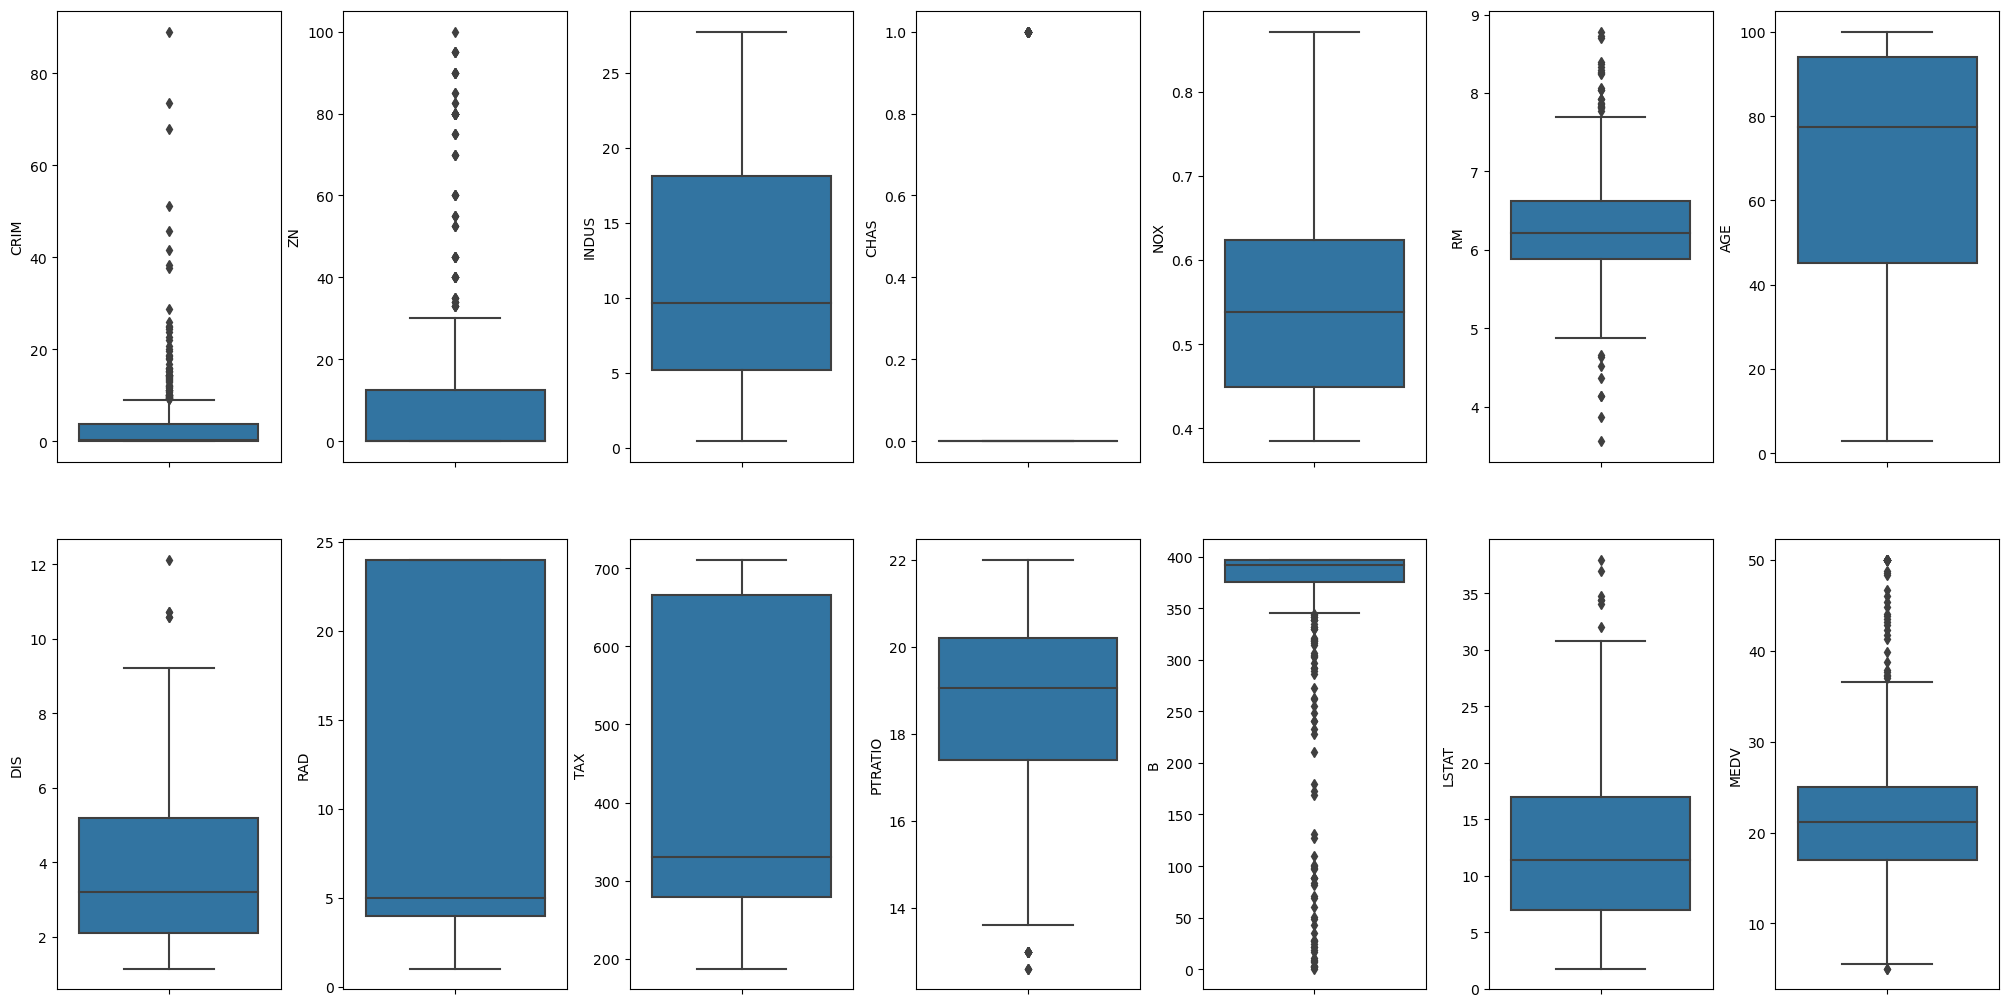

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in house.items():
    sns.boxplot(y=k, data=house, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

***Columns like CRIM, ZN, RM, B have some outliers***

In [103]:
import numpy as np
for k, v in house.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(house)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [104]:
x = house.iloc[:,0:13]
y = house.iloc[:,-1]

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (Linear Regression) :{lr_mae}")
print(f"Mean Squared Error (Linear Regression)) :{lr_mse}") 
print(f"R2 Score (Linear Regression) : {lr_r2}")  
   

Mean Absolute Error (Linear Regression) :3.214525136194578
Mean Squared Error (Linear Regression)) :21.79041981446301
R2 Score (Linear Regression) : 0.6736413385730083


In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
rfr_mae = mean_absolute_error(y_test, y_pred)
rfr_mse = mean_squared_error(y_test, y_pred)
rfr_r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (RandomForestRegressor) :{rfr_mae}")
print(f"Mean Squared Error (RandomForestRegressor)) :{rfr_mse}") 
print(f"R2 Score (RandomForestRegressor) : {rfr_r2}")  
   

Mean Absolute Error (RandomForestRegressor) :2.166735294117648
Mean Squared Error (RandomForestRegressor)) :10.007653107843138
R2 Score (RandomForestRegressor) : 0.8501137518179639


In [108]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)
knr_mae = mean_absolute_error(y_test, y_pred)
knr_mse = mean_squared_error(y_test, y_pred)
knr_r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (RandomForestRegressor) :{knr_mae}")
print(f"Mean Squared Error (RandomForestRegressor)) :{knr_mse}") 
print(f"R2 Score (RandomForestRegressor) : {knr_r2}")

Mean Absolute Error (RandomForestRegressor) :3.996666666666667
Mean Squared Error (RandomForestRegressor)) :41.97477254901962
R2 Score (RandomForestRegressor) : 0.3713370050030831


In [109]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
s = SVR()
s.fit(x_train,y_train)
y_pred = s.predict(x_test)
s_mae = mean_absolute_error(y_test, y_pred)
s_mse = mean_squared_error(y_test, y_pred)
s_r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (RandomForestRegressor) :{s_mae}")
print(f"Mean Squared Error (RandomForestRegressor)) :{s_mse}") 
print(f"R2 Score (RandomForestRegressor) : {s_r2}")

Mean Absolute Error (RandomForestRegressor) :4.556527774290586
Mean Squared Error (RandomForestRegressor)) :60.52751940333784
R2 Score (RandomForestRegressor) : 0.09346949805627691


In [110]:
from sklearn.model_selection import cross_val_score
ml_model = [lr, rfr, knr, s]
for i in ml_model:
    accuracy = cross_val_score(estimator=i, X=x_train, y=y_train, cv=10)
    print('accuracy score of {} is {}'.format(i,accuracy.mean()))


accuracy score of LinearRegression() is 0.7235659002005529
accuracy score of RandomForestRegressor() is 0.8593559318251629
accuracy score of KNeighborsRegressor() is 0.5241830361368092
accuracy score of SVR() is 0.19234767117489956


***Between all models, Random Forest Regression has the highest mean accuracy. Therefore, Random Forest regression is the most suitable model to predict Boston house price based on provided features.***
